In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping 
from keras.regularizers import L2

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

# EDA

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

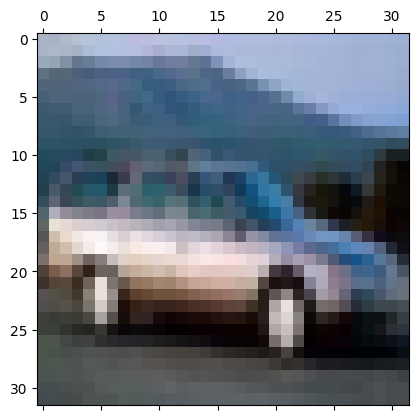

In [5]:
plt.matshow(x_train[4])

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y = y_train.flatten()

In [8]:
y

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
 def plot_sample(x,y,index):
     plt.figure(figsize=(14,3))
     plt.imshow(x[index])     

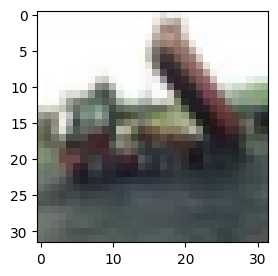

In [10]:
plot_sample(x_train,y_train,2)

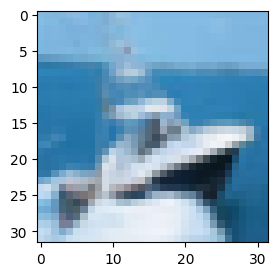

In [11]:
plot_sample(x_train,y_train,8)

#  data scaling using numpy

In [12]:
x_train = x_train / 255
x_test = x_test /255

In [13]:
32 *32*3

3072

# Building simple neural network

In [14]:
ann = models.Sequential( [
    # input layer
    layers.Flatten(input_shape=(32,32,3)),
    # hidden layers
    layers.Dense(3000, activation='relu'),
    layers.Dense(2000,activation='relu'),

    # output layer
    layers.Dense(10,activation='softmax') ])



ann.compile(loss='sparse_categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])


ann.fit(x_train,y_train,epochs=5, batch_size=300)

In [15]:
ann.evaluate(x_test,y_test)

In [16]:
ann.evaluate(x_train,y_train)

# Building  model using CNN

In [17]:
cnn = models.Sequential( [

      # Convolutional block 1
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding ='same', input_shape =(32,32,3)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding ='same'),
    layers.BatchNormalization(),
    
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),


    
      # Convolutional block 2
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
            
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    

    ### ANN network
    layers.Flatten(),
    layers.Dense(356,activation='relu',kernel_regularizer=L2(l2=0.1)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),


    # output layer
    layers.Dense(10,activation='softmax')])


cnn.compile(loss='sparse_categorical_crossentropy' , metrics=['accuracy'],
            optimizer='adam'),

cnn.fit(x_train,y_train, batch_size=100, epochs =20, validation_data=(x_test,y_test), 
        callbacks=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

C:\Users\gauri\OneDrive\Desktop\Deep_Learning\tfkenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.3810 - loss: 15.2489 - val_accuracy: 0.3769 - val_loss: 2.6811
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 50s 100ms/step - accuracy: 0.5785 - loss: 1.9776 - val_accuracy: 0.6153 - val_loss: 1.7603
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 103ms/step - accuracy: 0.6246 - loss: 1.7994 - val_accuracy: 0.6357 - val_loss: 1.7564
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1000s 2s/step - accuracy: 0.6503 - loss: 1.7485 - val_accuracy: 0.6510 - val_loss: 1.7101
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.6749 - loss: 1.6882 - val_accuracy: 0.6554 - val_loss: 1.7618
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.6856 - loss: 1.6714 - val_accuracy: 0.6747 - val_loss: 1.7056
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.6973 - loss: 1.6502 - val_accuracy: 0.6524 - val_loss: 1.7896
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 97ms/step - accuracy: 0.7068 - loss: 1.637

In [18]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7687 - loss: 1.4020


[1.408097743988037, 0.7634999752044678]

In [19]:
cnn.evaluate(x_train,y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7960 - loss: 1.3146


[1.3140028715133667, 0.7965800166130066]

In [23]:
y_pd = cnn.predict(x_test)
y_pd

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[6.5961183e-04, 2.3946059e-03, 9.2407299e-04, ..., 1.9033057e-04,
        3.4785445e-03, 4.2555621e-03],
       [9.6572301e-05, 4.7440812e-02, 7.9052023e-07, ..., 1.3957717e-07,
        9.5126438e-01, 1.1824493e-03],
       [1.3688192e-03, 1.4159684e-01, 2.1644184e-05, ..., 1.2665124e-05,
        8.3740789e-01, 1.9244660e-02],
       ...,
       [1.2957536e-05, 7.1590803e-06, 1.6093942e-03, ..., 2.9698620e-03,
        2.6076923e-05, 2.8226334e-05],
       [1.5359312e-02, 9.7259778e-01, 3.4665812e-03, ..., 6.7885051e-04,
        8.4328547e-04, 9.1241841e-04],
       [4.5163881e-05, 1.8780085e-05, 8.4868906e-04, ..., 9.9393761e-01,
        2.0769476e-06, 1.5396747e-05]], dtype=float32)

In [35]:
y_test [:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [34]:
y_pd1 =[ np.argmax(i) for i in y_pd]
y_pd1[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [27]:
precision_score(y_test,y_pd1,average='micro')

0.7635

In [28]:
confusion_matrix(y_test,y_pd1)

array([[776,  25,  24,  15,  24,   4,   7,  23,  53,  49],
       [  4, 918,   0,   3,   3,   2,   1,   3,  14,  52],
       [ 78,   7, 514,  53, 144,  83,  49,  50,  10,  12],
       [ 14,   4,  34, 538,  66, 211,  27,  47,  26,  33],
       [ 11,   2,  22,  43, 774,  31,  12,  95,   8,   2],
       [  7,   4,  22, 114,  36, 748,   7,  55,   2,   5],
       [ 10,   3,  23,  50,  92,  44, 757,  10,   6,   5],
       [ 14,   5,  19,  19,  26,  53,   1, 845,   4,  14],
       [ 58,  26,   0,   8,   3,   2,   1,   5, 848,  49],
       [ 11,  44,   1,   4,   3,   1,   2,   6,  11, 917]])

In [29]:
recall_score(y_test,y_pd1,average='micro')

0.7635